<a href="https://colab.research.google.com/github/luna0611/08MBID---Visualizacion-de-Datos/blob/main/TrabajoPractico_LuzCordoba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **TRABAJO PRÁCTICO**


**Máster en Big Data y Data Science**

08MBID - Visualización de Datos

Nombre: LUZ ADRIANA CORDOBA CASTRO

Fecha:  NOVIEMBRE 24 2022

Curso 2022 – Ed. Abril

- # **Demanda de servicios en una entidad de salud**


<img src="https://image.freepik.com/vector-gratis/conjunto-personajes-dibujos-animados-medico-concepto-equipo-personal-medico-hospital_36082-551.jpg" width=380>

Este proyecto es la Propuesta del Módulo de Minería de datos y la Estadística Avanzada.

# 1.Entendimiento del Caso

La demanda por servicios de salud es la cantidad de atención médica requerida por una población a uno o más prestadores en un periodo de tiempo; está referida a los servicios y resulta de la voluntad de las personas para ir a donde se brindan las atenciones, para esperar o para pagar por ellas. El médico, especialista y procedimiento, por un lado, actúa en interés del paciente y, por otro, en función de su propio interés, como un oferente del servicio. Por ello, puede inducir demanda y el paciente acudirá al médico tantas veces como éste lo solicite.

Es por ello por lo que este estudio propone un diseño del proceso para el pronóstico y análisis de demanda en la atención en los servicios de salud de este prestador.

En base a esto podemos responder a preguntas como por ejemplo ¿Estoy creciendo realmente como prestador o solo es un crecimiento estacional? ¿Qué impacto tienen las pandemias? ¿Cuándo consultan más mis afiliados?



**Objetivos**

•	Caracterizar o segmentar la demanda de acuerdo con las características que cuente la base de datos, como el número de pacientes, el tipo de atención, unidades, sedes, especialidades y para poder generar una ventaja competitiva; se debe, además, estar preparado para actuar frente a los distintos escenarios que el paciente requiera.


**Hipótesis**

•	La demanda puede aumentar o disminuir de acuerdo con los fenómenos y características específicas del usuario y comportamiento de los riesgos, enfermedades. 



**Recomendación o consideración**

Actualmente, los datos son proporcionados por una institución de salud donde se tienen en cuenta la confidencialidad, debido a pertenecer a información asistencial y clínica de  usuarios. Por ende, en este estudio no se podrá compartir los datos y expresamente se realizará los análisis resguardando el nombre, ubicación y datos vulnerables que desacaten esta norma o consideración.


# 2.Entendimiento de los datos

Para este estudio y con ayuda del *proceso KDD* se plantean los siguientes pasos para realizar la minería de los datos adecuada en este estudio. Después de llevar a cabo el entendimiento del negocio donde se aclara el problema, objetivos e hipótesis del estudio, se continua con el entendimiento de los datos, es importante llevar a cabo esta etapa pues se logra recolectar, describir, explorar y garantizar la calidad de los datos. Sin embargo, nos adentramos a la preparación de ellos con ayuda de la metodología *KDD*, ya que en esta etapa nos centramos en la selección, limpieza, preprocesamiento, análisis descriptivos o exploratorio y transformación de los datos.

### **2.1.  Recolección inicial de datos**

**Población de estudio:** población de una entidad de salud que ofrece servicios de atención y citas médicas.

**Unidad muestral:** características de la población atendida en diferentes sedes de una entidad de salud entre el periodo 2017 al 2019. En este estudio se cuenta con un dataset compuesto por 108.981 registros de los clientes.


**Variables o características de estudio:** El dataset consta de 7 variables las cuales corresponden a características de la atención de los usuarios.


El dataset presenta las siguientes descripciones y estructura:


| Variable | Definición	| Formato | 
| --- | --- | --- |
|idpaciente|Código del usuario|Numérico|
|programa|Descripción del programa de servicio prestado|Texto|
|especialidad|Descripción de la especialidad del personal que prestó el servicio|Texto|
|grupo|segmentos de los servicios de la especialidad que prestó el servicio|Texto|
|genero|Sexo del usuario|Texto|
|dpto|Código del departamento donde se prestó el servicio|Numérico|
|fechacita|Fecha de la cita|Fecha|

#### **2.1.1.Importar librerías**


In [ ]:

# Ignorar advertencias del código.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U plotly        # Instalamos Plotly (trabajaremos con la versión más reciente).
!pip install -U geopandas     # Instalamos GeoPandas (importante para cargar las formas de los mapas de ejemplo).

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importar librerías
import numpy as np
import pandas as pd
from scipy import stats
import scipy
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.dpi'] = 300   

import geopandas as gpd

import matplotlib as mpl

import plotly
import plotly.graph_objs as go 
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import scipy
from pylab import rcParams

rcParams['figure.figsize'] = 60, 40 # Golden Mean

from collections import Counter

from datetime import datetime,date

%matplotlib inline

# Ignorar advertencias del código.
import warnings
warnings.filterwarnings('ignore')

#### **2.1.2.Leer el archivo de datos**

El *dataset* presenta las siguientes variables:

In [ ]:
# se carga el archivo de datos 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **2.2.  Descripción de los datos**

Se puede observar a continuación la cantidad y tipo de datos que compone las variables de estudio:

**Tipos de variables**

In [ ]:
# se consulta el dataset para validar la estructura de las variables y cantidad de registros

df = pd.read_csv('data.txt',delimiter='|')
 
df.head(2)

,idpaciente,programa,genero,grupo,especialidad,dpto,fecha_cita
0,14960463,EVENTO,M,ODONTOLOGIA,ODONTOLOGIA,5,2017-04-27
1,12208143,EVENTO,M,ODONTOLOGIA,PERIODONCIA,76,2017-05-05


In [ ]:
# se consulta la estructura de los datos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108981 entries, 0 to 108980
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   idpaciente    108981 non-null  int64 
 1   programa      108981 non-null  object
 2   genero        108981 non-null  object
 3   grupo         108981 non-null  object
 4   especialidad  108981 non-null  object
 5   dpto          108981 non-null  int64 
 6   fecha_cita    108981 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.8+ MB


In [ ]:
# se cosulta el total de variables y registros

print("Total de registros y variables:"+ '\n')

print(df.shape)


Total de registros y variables:

(108981, 7)


### **2.3.  Exploración de los datos**


El dataset presenta variables cualitativas con tipo de datos factor, con dos o más categorias nominales como el género, el programa, la especialidad, el departamento de ubicación. La variables cuantitativas se encuentran  con tipo numérico discreto como el Id del usuario.

Además, el dataset presenta la fecha que los usuarios presentaron la cita o procedimiento en cada una de las sedes ubicadas en los departamentos donde opera la entidad de salud.
 

Se muestra un resumen de las estadísticas descriptivas  en el cual se puede apreciar que de acuerdo con la estructura de los datos se calcula los promedios, los cuartiles para la   distribución de los datos cuantitativos , y de manera agrupada la distribucipon de las variables categóricas.

**Resumen de las variables númericas**

In [ ]:
df.describe()

,idpaciente,dpto
count,1.089810e+05,108981.000000
mean,1.384309e+09,74.249007
std,9.099208e+09,10.093250
min,3.330000e+02,1.000000
25%,3.031224e+07,76.000000
50%,6.700293e+07,76.000000
75%,1.112465e+09,76.000000
max,1.059982e+11,76.000000


Se puede observar que el dataset se componen de variables numéricas de como el id de paciente que a su vez solo es para identificar el usuario que utilizo los servicios y el código del departamento donde se encuentra ubicado el centro asistencial de salud.


**Resumen de las variables categóricas**

In [ ]:
df.describe(include = ['O'])

,programa,genero,grupo,especialidad,fecha_cita
count,108981,108981,108981,108981,108981
unique,2,2,9,37,325
top,EVENTO,F,PROCEDIMIENTO,AUXILIAR ENFERMERIA,2019-10-01
freq,89862,74994,48467,38674,3482


En lo anterior, podemos observar que aunque se presenten todas como categóricas, no todas tienen esta procedencia, ya que las variables fechas son tenidas en cuenta por ser tipo *string*. Por otro lado, interesa validar las categórias que presentan las siguientes variables:

In [ ]:
print("Se visualiza la distribución de la variable 	programa:"+ '\n')

df['programa'].value_counts(dropna=False)

Se visualiza la distribución de la variable 	programa:



EVENTO    89862
PYP       19119
Name: programa, dtype: int64

Con esta variable podemos obtener el tipo de programa donde se prestó el servicio al usuario. 

El evento son todas esos servicios prestados por consultas prioritarias o por urgencias debido a una situación de consulta por enfermedad repentinas o accidentes y también de manera particular.

PYP son los programas de prevención y promoción para las enfermedades de control y crónicas como la hipertensión, diabetes u otras.



In [ ]:
print("Se visualiza la distribución de la variable especialidad:"+ '\n')

df['especialidad'].value_counts(dropna=False)

Se visualiza la distribución de la variable especialidad:



AUXILIAR ENFERMERIA          38674
ECOGRAFIAS                   18763
ODONTOLOGIA                  14171
MEDICINA GENERAL              9436
MONITORIAS                    5457
RIESGO CARDIOVASCULAR         5376
ENFERMERIA                    4336
HIGIENISTA                    3721
RADIOLOGIA                    1901
GINECOLOGIA Y OBSTETRICIA     1099
CRECIMIENTO Y DESARROLLO       720
PEDIATRIA                      702
PROMOCION Y PREVENCION         525
FISIOTERAPIA                   444
ANESTESIOLOGIA                 357
FONOAUDIOLOGIA                 325
PSICOLOGIA                     314
ORTODONCIA                     311
NUTRICION                      291
ORTOPEDIA Y TRAUMATOLOGIA      264
CONTROL PRENATAL               256
MEDICINA INTERNA               247
DERMATOLOGIA                   207
MEDICINA FAMILIAR              198
REHABILITACION ORAL            178
OTORRINOLARINGOLOGIA           154
CIRUGIA GENERAL                153
TRABAJO SOCIAL                  75
NEUROCIRUGIA        

Con esta variable se puede obtener las especialidades del profesional médico o asistencial que presta la atención, esto permite agrupar los servicios prestados de acuerdo con el grupo y la especialidad

In [ ]:
print("Se visualiza la distribución de la variable grupo:"+ '\n')

df['grupo'].value_counts(dropna=False)

Se visualiza la distribución de la variable grupo:



PROCEDIMIENTO                48467
IMAGENOLOGIA                 18763
ODONTOLOGIA                  14723
ESPECIALIDAD                 14043
MEDICINA GENERAL              9436
CONTROL                       1501
GINECOLOGIA Y OBSTETRICIA     1099
PEDIATRIA                      702
MEDICINA INTERNA               247
Name: grupo, dtype: int64

In [ ]:
print("Se visualiza la distribución de la variable genero:"+ '\n')

df['genero'].value_counts(dropna=False)

Se visualiza la distribución de la variable genero:



F    74994
M    33987
Name: genero, dtype: int64

Con esta variable se puede obtener el sexo que corresponde el usuario.

In [ ]:
df['fecha_cita']=pd.to_datetime(df['fecha_cita'])

In [ ]:
df['fecha_cita'].value_counts(dropna=False)

2019-10-01    3482
2018-01-01    3476
2019-08-01    3457
2019-01-01    3424
2019-07-01    3417
              ... 
2017-11-05       5
2017-01-01       4
2017-12-31       4
2017-11-12       3
2017-09-24       2
Name: fecha_cita, Length: 325, dtype: int64

La variable fecha de la cita que permite identificar los tiempos de la consulta. 

 ### **2.4.  Calidad de los datos**

En esta etapa se verifica la calidad de los datos en cuanto a datos faltantes y formato.

**Revisar datos faltantes**

In [ ]:
# Identificamos el número de missing values en cada columna
df.isnull().sum().sort_values()

idpaciente      0
programa        0
genero          0
grupo           0
especialidad    0
dpto            0
fecha_cita      0
dtype: int64

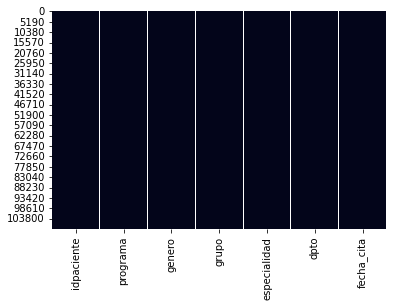

In [ ]:
# Identificamos los missing values visualmente

import seaborn as sns


sns.heatmap(df.isnull(), cbar=False)

Mediante este gráfico es fácil encontrar patrones y vínculos existentes entre los *missing values* en las diferentes variables. En este caso no se tienen datos faltantes. 



# **3.Preparación de los datos**

En esta etapa se desarrollará el proceso de manipulación, limpieza y preprocesamiento del archivo de datos.


## **3.1.  Categorización de variables**


- **Categorización de la variable *Fecha de la cita o atención***

In [ ]:
df['fecha_cita_anho'] = pd.to_datetime(df['fecha_cita']).dt.strftime('%Y-%m')
df['year'] = pd.to_datetime(df['fecha_cita']).dt.strftime('%Y')
df['mounth'] = pd.to_datetime(df['fecha_cita']).dt.strftime('%m')


df.head(3)

,idpaciente,programa,genero,grupo,especialidad,dpto,fecha_cita,fecha_cita_anho,year,mounth
0,14960463,EVENTO,M,ODONTOLOGIA,ODONTOLOGIA,5,2017-04-27,2017-04,2017,04
1,12208143,EVENTO,M,ODONTOLOGIA,PERIODONCIA,76,2017-05-05,2017-05,2017,05
2,16624567,EVENTO,M,ODONTOLOGIA,PERIODONCIA,76,2017-04-07,2017-04,2017,04


## **3.2. Panel de variables**

A continuación, se procede a generar un panel de los datos donde se genera un conteo de los servicios prestados agrupados por las variables de fecha  (año, mes), especialidad, programa y departamento.

In [ ]:
dfb = df.groupby(['fecha_cita_anho','programa','especialidad','grupo','genero','dpto'])['idpaciente'].count().reset_index()
dfb.head(3)

,fecha_cita_anho,programa,especialidad,grupo,genero,dpto,idpaciente
0,2017-01,EVENTO,ANESTESIOLOGIA,ESPECIALIDAD,F,76,2
1,2017-01,EVENTO,AUXILIAR ENFERMERIA,PROCEDIMIENTO,F,66,1
2,2017-01,EVENTO,AUXILIAR ENFERMERIA,PROCEDIMIENTO,F,76,558


El dataset queda conformado por 3462 casos.

# **4. Visualización de los datos**

En esta etapa  permitiran describir el comportamiento y tendencia de los datos mediante visualizaciones.

**Panel de programa y fecha**

In [ ]:
#Se crea el panel de conteo de servicios por fecha y programa

prog = dfb.groupby(['fecha_cita_anho','programa'])['idpaciente'].sum().reset_index()
prog.head(3)

,fecha_cita_anho,programa,idpaciente
0,2017-01,EVENTO,2418
1,2017-01,PYP,779
2,2017-02,EVENTO,2264


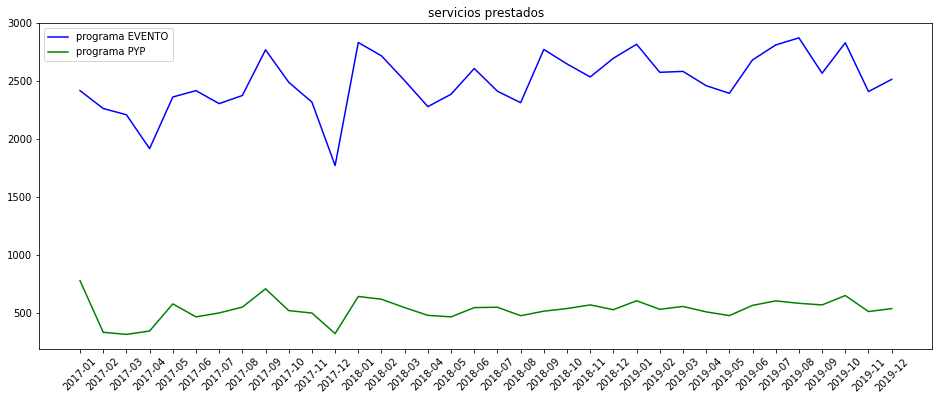

In [ ]:
figure(figsize=(16,6))
plt.plot( 'fecha_cita_anho', 'idpaciente', data=prog[prog.programa=='EVENTO'],color='blue', label='programa EVENTO')
plt.plot( 'fecha_cita_anho', 'idpaciente', data=prog[prog.programa=='PYP'], color='green', label='programa PYP')
plt.title("servicios prestados")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Panel de programa, género y fecha**

In [ ]:
gen = dfb.groupby(['fecha_cita_anho','programa','genero'])['idpaciente'].sum().reset_index()
gen.head(3)

,fecha_cita_anho,programa,genero,idpaciente
0,2017-01,EVENTO,F,1599
1,2017-01,EVENTO,M,819
2,2017-01,PYP,F,556


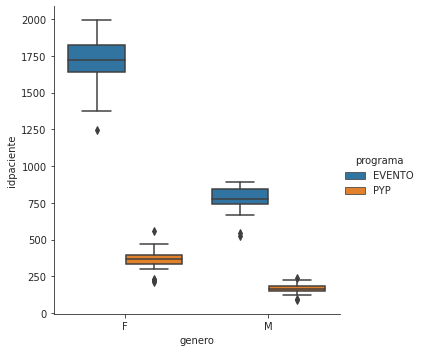

In [ ]:
#BoxPlot de la edad por sexo y clase
with sns.axes_style(style='ticks'):
 ax = sns.catplot("genero", "idpaciente", "programa" , data=gen, kind="box")

In [ ]:
import plotly.express as px

fig = px.box(gen, x="genero", y="idpaciente", color="programa")

fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()
fig.write_html("figura.html")

In [ ]:
import plotly.express as px

fig = px.box(gen, x="genero", y="idpaciente", color="programa",
             notched=True, # used notched shape
             title="Box plot género y programa de atención"
            )
fig.show()

In [ ]:
import plotly.express as px

fig = px.box(gen, x="genero", y="idpaciente")
fig.show()
fig.write_html("figura2.html")

**Panel de programa y especialidad**

In [ ]:
esp = dfb.groupby(['programa','especialidad'])['idpaciente'].sum().reset_index()

In [ ]:
esp2 = esp.groupby(['especialidad'])['idpaciente'].sum().reset_index()

Text(0, 0.5, 'Atenciones')

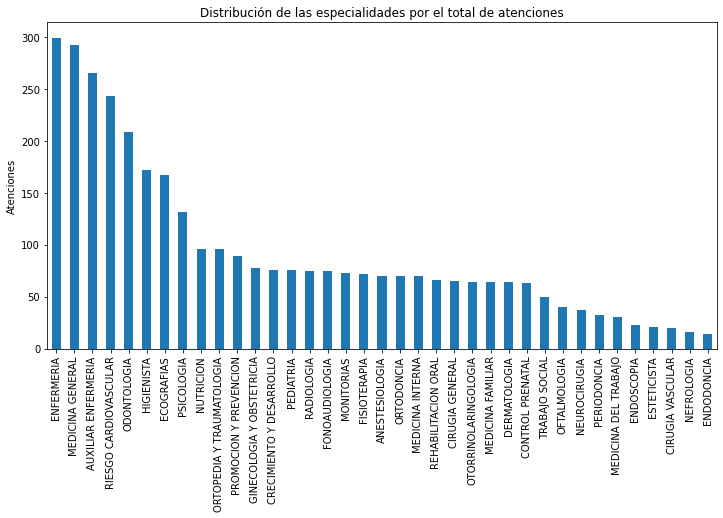

In [ ]:
plt.figure(figsize=(12,6))

count_classes = pd.value_counts(dfb['especialidad'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribución de las especialidades por el total de atenciones")
plt.xlabel('', fontsize=10)
plt.xticks(fontsize=10, rotation=90)
plt.ylabel("Atenciones")
#plt.xaxis.label.set_size(16)

In [ ]:
espg = dfb.groupby(['especialidad'])['idpaciente'].sum().reset_index()
espg.head(3)

,especialidad,idpaciente
0,ANESTESIOLOGIA,357
1,AUXILIAR ENFERMERIA,38674
2,CIRUGIA GENERAL,153


In [ ]:
import plotly.express as px

fig = px.bar(espg, y='idpaciente', x='especialidad', text='idpaciente')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis={'categoryorder':'total descending'})
fig.show()
fig.write_html("figura3.html")

**Panel de género y grupo**



In [ ]:
grup = dfb.groupby(['genero','grupo'])['idpaciente'].sum().reset_index()
grup

,genero,grupo,idpaciente
0,F,CONTROL,1116
1,F,ESPECIALIDAD,8055
2,F,GINECOLOGIA Y OBSTETRICIA,1099
3,F,IMAGENOLOGIA,14949
4,F,MEDICINA GENERAL,6152
5,F,MEDICINA INTERNA,99
6,F,ODONTOLOGIA,8642
7,F,PEDIATRIA,332
8,F,PROCEDIMIENTO,34550
9,M,CONTROL,385


In [ ]:
##grup['F'] = np.where(grup['genero'] == 'F', grup['idpaciente'], '')
#grup['M'] = np.where(grup['genero'] == 'M', grup['idpaciente'], '')
#grup.head(3)

In [ ]:
#grupT = grup.groupby(['grupo'])['M','F'].sum().reset_index()
#grupT.head(3)

In [ ]:
import plotly.express as px

fig = px.bar(grup, x="grupo", y="idpaciente",
            color='genero', barmode='group',
            height=500)
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide',xaxis={'categoryorder':'total descending'})
#fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()




**Panel de programa y grupo**

In [ ]:
grup2 = dfb.groupby(['programa','grupo'])['idpaciente'].sum().reset_index()
grup2

,programa,grupo,idpaciente
0,EVENTO,CONTROL,85
1,EVENTO,ESPECIALIDAD,5244
2,EVENTO,GINECOLOGIA Y OBSTETRICIA,1049
3,EVENTO,IMAGENOLOGIA,18763
4,EVENTO,MEDICINA GENERAL,8546
5,EVENTO,MEDICINA INTERNA,247
6,EVENTO,ODONTOLOGIA,14681
7,EVENTO,PEDIATRIA,702
8,EVENTO,PROCEDIMIENTO,40545
9,PYP,CONTROL,1416


In [ ]:
import plotly.express as px

fig = px.bar(grup2, x="grupo", y="idpaciente",
            color='programa', barmode='group',
            height=500)
fig.update_layout(uniformtext_minsize=20, uniformtext_mode='hide',xaxis={'categoryorder':'total descending'})
#fig.update_traces(texttemplate='%{text:.2%}', textposition='inside')
#fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()


**Panel de tiempos**

In [ ]:
monthly_sales = df.groupby(['year','mounth'])['idpaciente'].count().reset_index()
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        36 non-null     object
 1   mounth      36 non-null     object
 2   idpaciente  36 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes


In [ ]:
year_2017 = monthly_sales[monthly_sales['year'] == "2017"]
year_2017.head(2)

,year,mounth,idpaciente
0,2017,01,3197
1,2017,02,2598


In [ ]:
year_2018 = monthly_sales[monthly_sales['year'] == "2018"]
year_2018.head(2)

,year,mounth,idpaciente
12,2018,01,3476
13,2018,02,3337


In [ ]:
year_2019 = monthly_sales[monthly_sales['year'] == "2019"]
year_2019.head(2)

,year,mounth,idpaciente
24,2019,01,3424
25,2019,02,3108


In [ ]:
data_2017 = go.Scatter(
                    x = year_2017['mounth'],
                    y = year_2017['idpaciente'],
                    name = '2017',
                    mode = 'markers + lines',
                    customdata=year_2017[['year', 'mounth', 'idpaciente']],
                    hovertemplate =
                    '<br><b>Year</b>: %{customdata[0]}<br><extra></extra>'+
                    '<b>Month</b>: %{customdata[1]}'+
                    '<br><b>Atenciones</b>: $%{customdata[2]:,.0f}</br>'
)

data_2018 = go.Scatter(
                    x = year_2018['mounth'],
                    y = year_2018['idpaciente'],
                    name = '2018',
                    mode = 'markers + lines',
                    customdata=year_2018[['year', 'mounth', 'idpaciente']],
                    hovertemplate =
                    '<br><b>Year</b>: %{customdata[0]}<br><extra></extra>'+
                    '<b>Month</b>: %{customdata[1]}'+
                    '<br><b>Atenciones</b>: $%{customdata[2]:,.0f}</br>'
)

data_2019 = go.Scatter(
                    x = year_2019['mounth'],
                    y = year_2019['idpaciente'],
                    name = '2019',
                    mode = 'markers + lines',
                    customdata=year_2019[['year', 'mounth', 'idpaciente']],
                    hovertemplate =
                    '<br><b>Year</b>: %{customdata[0]}<br><extra></extra>'+
                    '<b>Month</b>: %{customdata[1]}'+
                    '<br><b>Atenciones</b>: $%{customdata[2]:,.0f}</br>'
)


data = [data_2017, data_2018, data_2019]

layout = go.Layout(
             title={
                'text': 'Atenciones',
                'y': 0.93,
                'x': 0.5,
                'xanchor': 'center',
                'yanchor': 'top'},
             titlefont={'family': 'Oswald',
                        'color': 'rgb(230, 34, 144)',
                        'size': 25},

             hovermode='x',
             height=600,

             xaxis=dict(title='<b>Month</b>',
                        tick0=0,
                        dtick=1,
                        color='rgb(230, 34, 144)',
                        showline=True,
                        showgrid=True,
                        showticklabels=True,
                        linecolor='rgb(104, 204, 104)',
                        linewidth=2,
                        ticks='outside',
                        tickfont=dict(
                            family='Arial',
                            size=12,
                            color='rgb(17, 37, 239)'
                        )

                ),

             yaxis=dict(title='<b>Atenciones</b>',
                        color='rgb(230, 34, 144)',
                        showline=True,
                        showgrid=True,
                        showticklabels=True,
                        linecolor='rgb(104, 204, 104)',
                        linewidth=2,
                        ticks='outside',
                        tickfont=dict(
                           family='Arial',
                           size=12,
                           color='rgb(17, 37, 239)'
                        )

                ),

             legend=dict(title='',
                         x=0.3,
                         y=0.95,
                         orientation='h',
                         bgcolor='rgba(255, 255, 255, 0)',
                         traceorder="normal",
                         font=dict(
                              family="sans-serif",
                              size=12,
                              color='#000000')),

                         legend_title_font_color="green", #this code is available only for legend title
#                          uniformtext_minsize=15,
#                          uniformtext_mode='hide',

                 )



figure2 = go.Figure(data=data, layout=layout)

figure2.show()
figure2.write_html("figura4.html")

In [ ]:
from plotly import graph_objects as go

stages = ["PROCEDIMIENTO","IMAGENOLOGIA","ODONTOLOGIA","ESPECIALIDAD","MEDICINA GENERAL","CONTROL","GINECOLOGIA Y OBSTETRICIA","PEDIATRIA","MEDICINA INTERNA"]
#stages = ["Homepage visit", "Search page visit",
 #          "Payment Page", "Payment Confirmation"]

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Femenino',
    y = stages,
    x = [34550,14949,8642,8055,6152,1116,1099,332,99],
    textposition = "inside",
    textinfo = "value+percent previous"
    , constraintext='outside'

    ,textfont=dict(
        family="sans serif",
        size=14,
        color="black"
    )

)


             )

fig.add_trace(go.Funnel(
    name = 'Masculino',
    orientation = "h",
    y = stages,
    x = [13917,3814,6081,5988,3284,385,0,370,148],
    textposition = "auto",
    textinfo = "value+percent previous"))

fig.show()
fig.write_html("figura5.html")

## **Bibliografía**
---

* [*Python* 3: documentación oficial.](https://docs.python.org/3/)
* [Documento oficial](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) y [Guía de usuario](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) de *Pandas*
* [*Plotly*: Visualization with Python](https://plotly.com/python/v3/create-online-dashboard-legacy/)
